<a href="https://colab.research.google.com/github/deepa258/MSDS462/blob/master/MSDS_462_A3_Cloud_Vision_API_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSDS 462 - Assignment 3 - Using Google Cloud Vision API
In this assignment, I have used the Google Cloud Vision API for detecting multiple objects in an image. The test images are downloaded from the internet.

### Importing Python packages


In [0]:
# To remove all future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [0]:
# One time mount

#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
#This is a one time installation of google cloud vision
#!pip install google-cloud-vision
from google.cloud import vision

imgpath = '/content/drive/My Drive/Colab Notebooks/A3 Images'
json_key = '/content/drive/My Drive/Colab Notebooks/mp-dp-462-e20ef13bc52c.json'

os.chdir(imgpath)

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = json_key

### Function for accessing the Cloud API to detect objects

In [0]:
def localize_objects(path):
    """Localize objects in the local image.

    Args:
    path: The path to the local file.
    """
    for img in path:

      client = vision.ImageAnnotatorClient()

      with open(img, 'rb') as image_file:
          content = image_file.read()
      image = vision.types.Image(content=content)

      objects = client.object_localization(
          image=image).localized_object_annotations

      fpath = imgpath + '/' + img
      print("Viewing file", img)
      i = plt.imread(fpath)
      plt.imshow(i)
      plt.xticks([])
      plt.yticks([])
      plt.show()

      print('Number of objects found: {}'.format(len(objects)))
      for object_ in objects:
          print('\n{} (confidence: {})'.format(object_.name, object_.score))
          print('Normalized bounding polygon vertices: ')
          for vertex in object_.bounding_poly.normalized_vertices:
              print(' - ({}, {})'.format(vertex.x, vertex.y))
      
      print('\n')

### Main

In [36]:
print(os.listdir('.'))

img_list = os.listdir('.')

['ball.png', 'cactus.jpg', 'cherries.jpg', 'dice.jpg', 'apples.jpg', 'teapot.jpg']


Viewing file ball.png


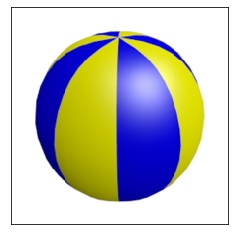

Number of objects found: 1

Ball (confidence: 0.8255314826965332)
Normalized bounding polygon vertices: 
 - (0.10901600122451782, 0.10827196389436722)
 - (0.8907256126403809, 0.10827196389436722)
 - (0.8907256126403809, 0.9023507237434387)
 - (0.10901600122451782, 0.9023507237434387)


Viewing file cactus.jpg


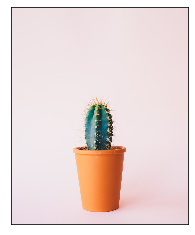

Number of objects found: 1

Flowerpot (confidence: 0.8256940245628357)
Normalized bounding polygon vertices: 
 - (0.3500232398509979, 0.6243725419044495)
 - (0.6432168483734131, 0.6243725419044495)
 - (0.6432168483734131, 0.9431427121162415)
 - (0.3500232398509979, 0.9431427121162415)


Viewing file cherries.jpg


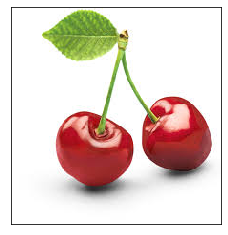

Number of objects found: 3

Fruit (confidence: 0.7995560169219971)
Normalized bounding polygon vertices: 
 - (0.19744813442230225, 0.47953590750694275)
 - (0.576122522354126, 0.47953590750694275)
 - (0.576122522354126, 0.8257882595062256)
 - (0.19744813442230225, 0.8257882595062256)

Fruit (confidence: 0.7800037860870361)
Normalized bounding polygon vertices: 
 - (0.6119936108589172, 0.41301968693733215)
 - (0.9549257159233093, 0.41301968693733215)
 - (0.9549257159233093, 0.7590745091438293)
 - (0.6119936108589172, 0.7590745091438293)

Food (confidence: 0.6826859712600708)
Normalized bounding polygon vertices: 
 - (0.13113521039485931, 0.007504657376557589)
 - (0.9505970478057861, 0.007504657376557589)
 - (0.9505970478057861, 0.8810324668884277)
 - (0.13113521039485931, 0.8810324668884277)


Viewing file dice.jpg


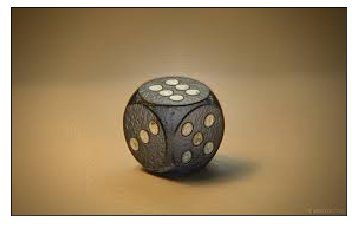

Number of objects found: 1

Dice (confidence: 0.8977824449539185)
Normalized bounding polygon vertices: 
 - (0.3261722922325134, 0.3274284303188324)
 - (0.6419448852539062, 0.3274284303188324)
 - (0.6419448852539062, 0.8282235860824585)
 - (0.3261722922325134, 0.8282235860824585)


Viewing file apples.jpg


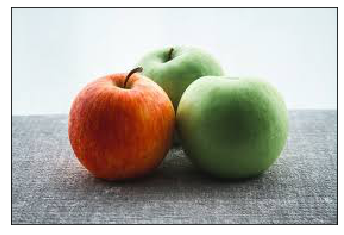

Number of objects found: 3

Apple (confidence: 0.9573228359222412)
Normalized bounding polygon vertices: 
 - (0.16938330233097076, 0.2651071846485138)
 - (0.5146813988685608, 0.2651071846485138)
 - (0.5146813988685608, 0.8085644245147705)
 - (0.16938330233097076, 0.8085644245147705)

Apple (confidence: 0.9498098492622375)
Normalized bounding polygon vertices: 
 - (0.34626880288124084, 0.2442520260810852)
 - (0.8446376919746399, 0.2442520260810852)
 - (0.8446376919746399, 0.7824012637138367)
 - (0.34626880288124084, 0.7824012637138367)

Fruit (confidence: 0.6591383218765259)
Normalized bounding polygon vertices: 
 - (0.3768421709537506, 0.1719522625207901)
 - (0.6423153281211853, 0.1719522625207901)
 - (0.6423153281211853, 0.4600641131401062)
 - (0.3768421709537506, 0.4600641131401062)


Viewing file teapot.jpg


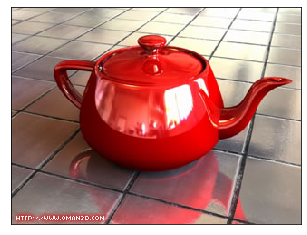

Number of objects found: 1

Teapot (confidence: 0.8794771432876587)
Normalized bounding polygon vertices: 
 - (0.1350613683462143, 0.13651145994663239)
 - (0.9705384373664856, 0.13651145994663239)
 - (0.9705384373664856, 0.7712265849113464)
 - (0.1350613683462143, 0.7712265849113464)




In [37]:
localize_objects(img_list)
  